In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", context="paper", font_scale=1.3)

In [18]:
res = pd.read_csv("results.csv", sep=";", header=None)

In [19]:
res_t = res.T
res_t.columns = ["Run", "Prompt", "Model", "Score1", "Score2"]
res_t["Score1"] = res_t["Score1"].astype(float)
res_t["Score2"] = res_t["Score2"].astype(float)
res_t["Score"] = res_t[["Score1", "Score2"]].mean(axis=1)

## RQ 1

([<matplotlib.axis.XTick at 0x21a06bee1a0>,
 [Text(0, 0, 'Gpt 3.5'), Text(1, 0, 'Llama 2'), Text(2, 0, 'TinyLlama')])

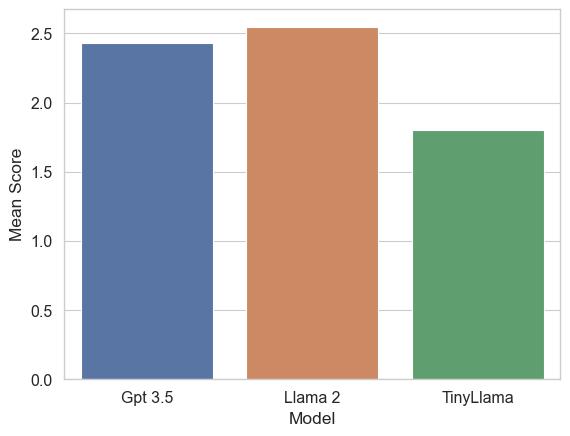

In [29]:
rq1 = res_t.pivot_table(
    index="Run", columns=["Model"], values=["Score"], aggfunc="mean"
)
sns.barplot(data=rq1.agg("mean").reset_index(), x="Model", y=0, hue='Model')
plt.ylabel("Mean Score")
plt.xticks([0, 1, 2], ["Gpt 3.5", "Llama 2", "TinyLlama"])

## RQ 2

([<matplotlib.axis.XTick at 0x21a07091c60>,
 [Text(0, 0, 'Gpt 3.5'), Text(1, 0, 'Llama 2'), Text(2, 0, 'TinyLlama')])

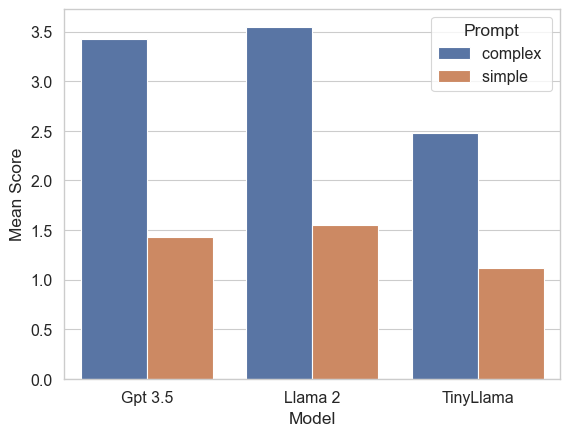

In [30]:
rq2 = res_t.pivot_table(
    index="Run", columns=["Model", "Prompt"], values=["Score"], aggfunc="mean"
)
sns.barplot(data=rq2.agg("mean").reset_index(), x="Model", y=0, hue="Prompt")
plt.ylabel("Mean Score")
plt.xticks([0, 1, 2], ["Gpt 3.5", "Llama 2", "TinyLlama"])

## RQ 3

In [41]:
rq3 = res_t.pivot_table(columns=["Model", "Prompt", "Run"], values=["Score"], aggfunc="mean")

,Model,Prompt,Run,0
0,gpt,complex,Run1,3.785714
1,gpt,complex,Run2,3.071429
2,gpt,complex,Run3,3.428571
3,gpt,simple,Run1,1.785714
4,gpt,simple,Run2,1.214286
5,gpt,simple,Run3,1.285714
6,llama,complex,Run1,3.642857
7,llama,complex,Run2,3.928571
8,llama,complex,Run3,3.071429
9,llama,simple,Run1,1.642857


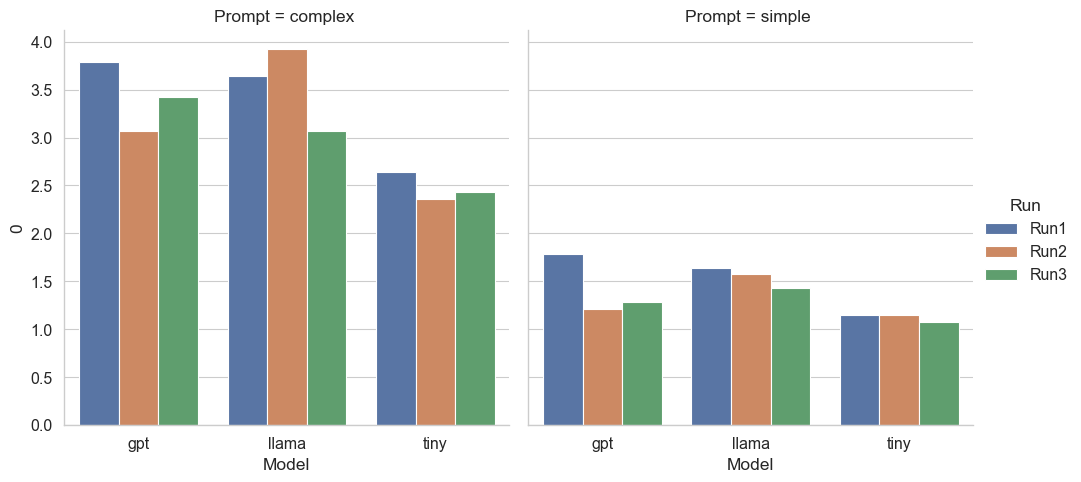

In [45]:
sns.catplot(
    data=rq3.aggregate("mean").reset_index(),
    x="Model",
    y=0,
    hue="Run",
    col="Prompt",
    kind="bar",
)